NLP Project - Fake News Classification

[Dataset](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification?resource=download)

Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load & View Dataset

In [4]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


Distribution of Fake vs Real News

In [5]:
# Label 1 = Fake-News, Label 0 = Real-News

label = df['label'].value_counts()
print(label)

label
1    37106
0    35028
Name: count, dtype: int64


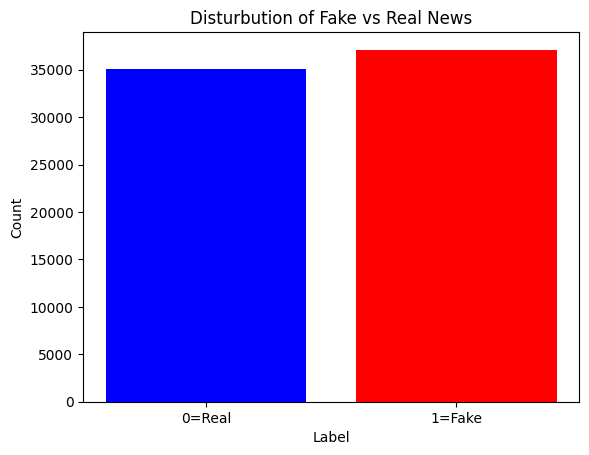

In [6]:
# Plot Distribution of Data

plt.bar(label.index, label.values, color=['red','blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Disturbution of Fake vs Real News')
plt.xticks([0, 1], ["0=Real", "1=Fake"])
plt.show()


Data Preprocessing

In [7]:
# remove first column

df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [8]:
# count number of missing values from dataframe

df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [9]:
# fill null values with space

df.fillna(' ', inplace=True)
df.isnull().sum()
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [10]:
# Clean Text
 
import re
import nltk     
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def clean(text):
    
    clean_text = str(text)
    
    clean_text = re.sub(r'[^a-zA-Z\s]','',clean_text) # Remove punctuation, numbers, special characters
    
    clean_text = clean_text.lower()  # Convert text to lowercase

    tokens = clean_text.split() # Perform tokenization on text
    
    stemm_tokens = [stemmer.stem(word) for word in tokens] # perform stemming on the tokens
    
    stop_words = set(stopwords.words('english')) # Get stopwords
    clean_text = [word for word in stemm_tokens if word not in stop_words] # remove stopwords from list of words
    
    
    return " ".join(clean_text) # Join list of words back into a string

df['title'] = df['title'].apply(clean) # Apply clean function to title column

df.head()


,title,text,label
0,law enforc high alert follow threat cop white ...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,unbeliev obama attorney gener say charlott rio...,"Now, most of the demonstrators gathered last ...",1
3,bobbi jindal rais hindu use stori christian co...,A dozen politically active pastors came here f...,0
4,satan russia unv imag terrifi new supernuk wes...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [11]:
# Drop Text Column

df.drop(columns=['text'], inplace=True, axis=1)

df.head()

,title,label
0,law enforc high alert follow threat cop white ...,1
1,,1
2,unbeliev obama attorney gener say charlott rio...,1
3,bobbi jindal rais hindu use stori christian co...,0
4,satan russia unv imag terrifi new supernuk wes...,1


In [12]:
# Define Feature and Target Variables

X = df['title'].values  # Feature
y = df['label'].values  # Target

Perform TF-IDF Vectorization on Dataset

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer Object
vectorizer = TfidfVectorizer()

# Fit and Transform Data
X = vectorizer.fit_transform(X)

print(X)

  (0, 23830)	0.1298856725356679
  (0, 21997)	0.24807949983741043
  (0, 8726)	0.4829269651769182
  (0, 2386)	0.3335359080112042
  (0, 24467)	0.19120636187649795
  (0, 4708)	0.25168565360198175
  (0, 22154)	0.25352235062479594
  (0, 8314)	0.2885916804200784
  (0, 511)	0.31730687314400363
  (0, 10161)	0.2738111480602588
  (0, 7000)	0.3177168148047847
  (0, 12447)	0.23034141165066577
  (2, 3451)	0.28066953262600147
  (2, 15179)	0.20307222300586106
  (2, 21031)	0.18301808114174997
  (2, 10400)	0.24670641175737698
  (2, 17548)	0.45752472344744827
  (2, 16350)	0.25402426311626203
  (2, 18782)	0.33019041068692767
  (2, 3746)	0.3310112331558339
  (2, 19396)	0.1466791694607408
  (2, 8907)	0.24209532332049763
  (2, 1487)	0.25872801761400843
  (2, 15368)	0.15490456622588997
  (2, 23109)	0.3270665750037422
  :	:
  (72130, 5650)	0.26561578620619886
  (72130, 24245)	0.2533899011710186
  (72130, 22677)	0.13445198030167463
  (72131, 10647)	0.46108704450324983
  (72131, 3297)	0.39534895912410334
  (7213

Split Dataset into Train & Test 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(57707, 25135)
(14427, 25135)
(57707,)
(14427,)


Perform Dimensionaility Reduction (Truncated SVD)

In [15]:
from sklearn.decomposition import TruncatedSVD

# Initalize TruncatedSVD
# Retain 1000 Features


svd = TruncatedSVD(n_components=1000)

# Apply on Train data
X_train = svd.fit_transform(X_train)

# Apply on Test data
X_test = svd.transform(X_test)

print(X_train.shape)
print(X_test.shape)



(57707, 1000)
(14427, 1000)


Building the Neural Network

In [16]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class NeuralNetwork(nn.Module):
    
    def __init__(self):
        
        super(NeuralNetwork, self).__init__()
        
        # Input to Hidden Layer
        self.input = nn.Linear(1000, 500)  # 1000 Inputs, 500 out
        # Activation Function RELU
        self.relu1 = nn.ReLU()              
        
        # Hidden Layer 1 to Hidden Layer 2
        self.hidden1 = nn.Linear(500, 250)   # 500 Inputs, 250 out
        # Activation Function RELU
        self.relu2 = nn.ReLU()
         
        # Hidden layer 2 to Hidden Layer 3
        self.hidden2 = nn.Linear(250, 50)    # 250 Inputs, 50 out
        # Activation Function RELU
        self.relu3 = nn.ReLU()
        
        
        # Hidden Layer 3 to Output
        self.hidden3 = nn.Linear(50, 1)   # 50 Inputs, 1 out
       
    
    
    def forward(self, x):
        
        # Input Layer
        x = self.input(x)
        x = self.relu1(x)
        
        # Hidden Layer 1
        x = self.hidden1(x)
        x = self.relu2(x)
        
        # Hidden Layer 2
        x = self.hidden2(x)
        x = self.relu3(x)
        
        # Hidden Layer 3 (Output)
        x = self.hidden3(x)
       
        
        return x

# Initalize Model
model = NeuralNetwork()
# Iniliztie ADAM optimizer, to update weights of the model
optimize = torch.optim.Adam(model.parameters(), lr=0.01)
# Define Loss Function (Binary Cross Entropy)
# Combines Sigmoid with Binary cross entropy
error = nn.BCEWithLogitsLoss()

In [17]:
# Convert Dataset to pytorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


Train the Model

In [18]:
EPOCHS = 20

# Loop for number of Epochs
for epoch in range(EPOCHS):
    
    
    # Forward Propagation (calling the forward method of the neural network)
    outputs = model(X_train)
    # Convert to 1D to match Y_train shape
    outputs = outputs.squeeze(1)
    
    
    # Compute Loss between outputs and true labels
    loss = error(outputs, y_train)  # error is the loss function defined earlier
    
    
    # Clears gradients before computing the new gradients for the next iteration 
    optimize.zero_grad()
    
    # Backward propogation 
    # Computes gradients of the loss function with respect to the parameters
    loss.backward()
    
    # Uses the chosen optimizer (Adam) to adjust the model's weights based on the gradients calculated in the backpropagation step
    optimize.step()
    
    print(f"Loss after iteration {epoch} = {loss}")

Loss after iteration 0 = 0.6931607127189636
Loss after iteration 1 = 0.6910275816917419
Loss after iteration 2 = 0.6709721088409424
Loss after iteration 3 = 0.6336297988891602
Loss after iteration 4 = 0.5716200470924377
Loss after iteration 5 = 0.49905773997306824
Loss after iteration 6 = 0.4347256124019623
Loss after iteration 7 = 0.3717150390148163
Loss after iteration 8 = 0.3494265079498291
Loss after iteration 9 = 0.33368995785713196
Loss after iteration 10 = 0.2787646949291229
Loss after iteration 11 = 0.2630746066570282
Loss after iteration 12 = 0.2734852135181427
Loss after iteration 13 = 0.24103239178657532
Loss after iteration 14 = 0.24752101302146912
Loss after iteration 15 = 0.22886227071285248
Loss after iteration 16 = 0.21660050749778748
Loss after iteration 17 = 0.20584772527217865
Loss after iteration 18 = 0.19134607911109924
Loss after iteration 19 = 0.1809975951910019


Evaluate the Model (Accuracy)

In [19]:
with torch.no_grad():     # Disable Gradient Computation
    # Perform forward pass using X_test data
    # Shape is [batch_size, 1]
    y_pred = model(X_test)  
    print(y_pred[0])
    
    # Convert y_pred output into labels (0 or 1)
    # reshape from [batch_size, 1] to [batch_size]
    # if greater than 0 (True) then class 1, less than or equal to 0 (False) then class 0
    # Turn boolean into integer values
    y_pred_labels = (y_pred.squeeze(1) > 0).int()
    print(y_pred_labels[0])
    
    # Calculate Accuracy 
    # compare predicted labels with actual labels 
    # divides by the total number of samples in y_test 
    accuracy = (y_pred_labels == y_test).sum().item() / y_test.size(0)
    print(f"Accuracy of the model is {accuracy}")

tensor([5.6722])
tensor(1, dtype=torch.int32)
Accuracy of the model is 0.8893740902474527


Confusion Matrix

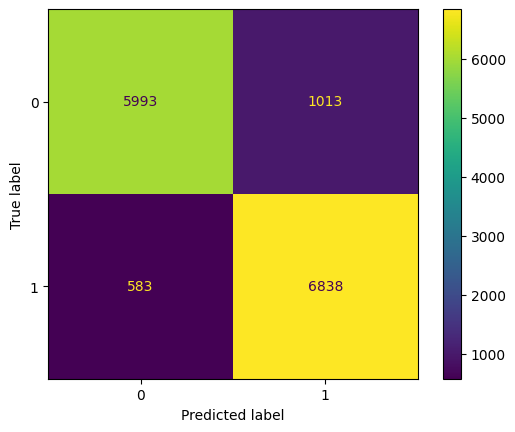

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Compute confusion matrix. Comparing true with predicyed labels
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_labels)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()